In [18]:
#initial imports
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [19]:
#api request for monthly temperature data
#DO NOT RUN- API key needs to be refreshed

# import requests

# url = "https://meteostat.p.rapidapi.com/point/monthly"

# querystring = {"lat":41.505493,"lon": -81.681290,"start":"1950-01-01","end":"2023-12-31","units":"imperial"}

# headers = {
# 	"x-rapidapi-key": "ae4d217936mshc03171f457253bcp10094djsnf873aa07cb5d",
# 	"x-rapidapi-host": "meteostat.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# print(response.json())


# data = response.json()



In [20]:
#temperature data cleaning

# print(data['data'])

# store = {"date":[], "temp":[], "precipitation":[], "windspeed":[], 'tmax':[], 'tmin':[]} #storing the API data in a dataframe
# for i in data['data']:
#     store["date"].append(i['date'])
#     store["temp"].append(i['tavg'])
#     store["precipitation"].append(i['prcp'])
#     store["windspeed"].append(i['wspd'])
#     store["tmax"].append(i['tmax'])
#     store["tmin"].append(i['tmin'])
# df = pd.DataFrame(store) 

df = pd.read_csv('Datasets/Cleveland Weather.csv')

df.date = pd.to_datetime(df.date) #using Pandas datetime to extract year and month values

df['month'] = df.date.dt.month

avg={'year':[], 'temp_dif':[], 'temp':[]}

base = df[df.date.dt.year == 1980]
baseline = np.mean(base['temp'])

frames = []
for i in range(1, 13): #loop to impute missing monthly temp values, used and developed by both group members
    frame = df[df.month == i]
    frame.reset_index(inplace=True)
    replace = np.nanmean(frame['temp'])
    for j in range(0, len(frame)):
        if np.isnan(frame['temp'][j]):
            frame['temp'][j] = replace
    frames.append(frame)

print(frames[0])

df = pd.concat(frames)

for i in range(1980, 2024): #aggregate monthly temp values into yearly values and year over year changes
    frame = df[df.date.dt.year == i]
    avg['year'].append(i)
    avg['temp'].append(np.mean(frame['temp']))
    avg['temp_dif'].append(np.mean(frame['temp']) - baseline)
avg = pd.DataFrame(avg)

# df = df.sort_values('date')  #store data as a csv
# df.to_csv("Cleveland Weather")
# avg.to_csv('Yearly Temp.csv')


    index  Unnamed: 0       date       temp  precipitation  windspeed  tmax  \
0       0           0 1950-01-01  36.300000          7.020       12.6  45.9   
1      12          12 1951-01-01  28.600000          3.724       11.7  36.3   
2      24          24 1952-01-01  27.085938          5.024       11.6  39.7   
3      36          36 1953-01-01  32.500000          4.035       10.9  40.5   
4      48          48 1954-01-01  27.000000          3.122       11.5  36.3   
..    ...         ...        ...        ...            ...        ...   ...   
69    828         828 2019-01-01  28.000000          3.189       12.2  34.9   
70    840         840 2020-01-01  36.300000          2.992       10.6  42.4   
71    852         852 2021-01-01  30.700000          1.693        8.9  35.2   
72    864         864 2022-01-01  24.600000          2.465       11.1  31.3   
73    876         876 2023-01-01  36.700000          5.547        9.8  41.7   

    tmin  month  
0   27.7      1  
1   23.5      1

Text(0.5, 1.0, 'Difference in Cleveland Annual Temperature from 1980')

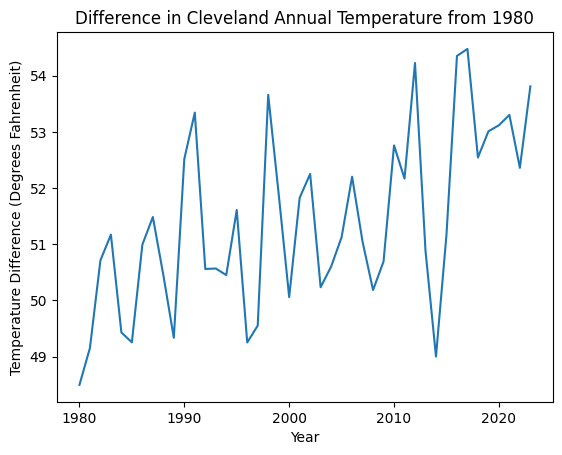

In [21]:
#exploratory temperature change over time plot

avg = pd.read_csv('Datasets/Yearly Temp.csv')
df = pd.read_csv('Datasets/Cleveland Weather.csv')
df.date = pd.to_datetime(df.date)

plot = sns.lineplot (x='year', y='temp', data=avg) #plot data in line plot
plot.set_xlabel('Year')
plot.set_ylabel('Temperature Difference (Degrees Fahrenheit)')
plot.set_title('Difference in Cleveland Annual Temperature from 1980')

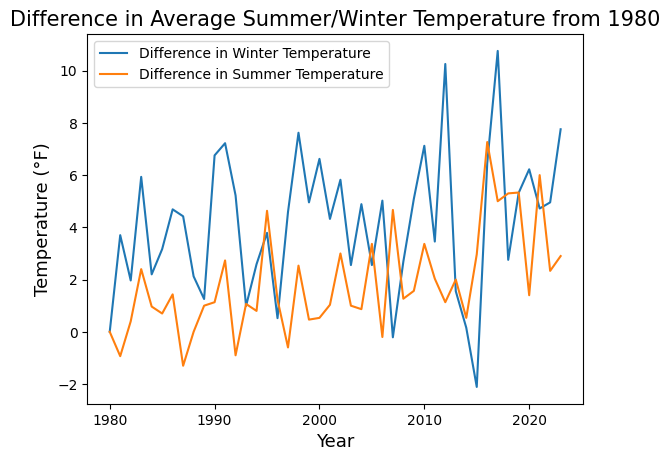

In [22]:
#seasonal temperature analysis

avg={'year':[], 'temp':[], 'tw':[], 'ts':[]}

base = df[df.date.dt.year == 1980]
baseline = np.mean(base['temp'])
baseline1 = np.mean(base['temp'][1:4]) #approximating winter and summer temps by month
baseline2 = np.mean(base['temp'][7:10])

for i in range(1980, 2024): #computing the change in seasonal temp year over year
    frame = df[df.date.dt.year == i] 
    avg['year'].append(i)
    avg['temp'].append(np.mean(frame['temp'])-baseline)
    avg['tw'].append(np.mean(frame['temp'][1:4])-baseline1)
    avg['ts'].append(np.mean(frame['temp'][7:10])-baseline2)
avg = pd.DataFrame(avg)

plot = sns.lineplot(x='year', y='tw', data=avg, label = 'Difference in Winter Temperature', alpha = 1) #plotting changes in seaasonal temp
sns.lineplot(x='year', y='ts', data=avg, label = 'Difference in Summer Temperature', alpha = 1)
plot .set_xlabel('Year', fontdict={'size':13})
plot.set_ylabel('Temperature (°F)', fontdict={'size':13})
plot.set_title('Difference in Average Summer/Winter Temperature from 1980', fontdict={'size':15})



df = df.sort_values('date')
# df.to_csv("Cleveland Weather.csv")


9      1950
21     1951
33     1952
45     1953
57     1954
       ... 
837    2019
849    2020
861    2021
873    2022
885    2023
Name: year, Length: 74, dtype: int32


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

 

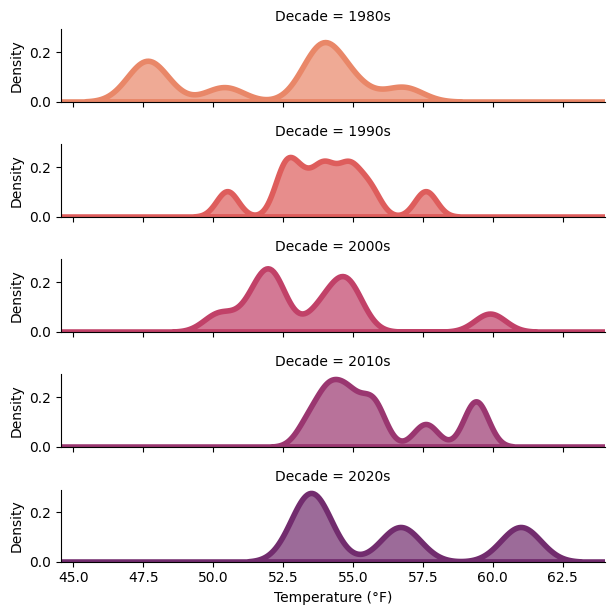

In [23]:
#KDE plot for October temperatures

dft = df.copy()

dft = dft[dft['month'] == 10] #selecting October as desired month

dft['year'] = dft.date.dt.year

print(dft.year)

dft = dft[dft['year'] > 1979]

start = 1970
decades = []
for i in range(0, 4): #adding decade column to dataframe so temp values can be sorted by decade
    for j in range(0, 10):
        decades.append(str(1980 + 10*i) + 's')
decades.append('2020s')
decades.append('2020s')
decades.append('2020s')
decades.append('2020s')
dft['Decade'] = decades
  
plot = sns.FacetGrid(dft, row="Decade", hue="Decade", aspect=5, height=1.25, palette='flare') #plotting the distributions for each decade
  
plot.map(sns.kdeplot, 'temp', 
       shade=True, alpha=0.7, lw=4, bw=0.2) 
  
plot.map(plt.axhline, y=0, lw=4) 

plot.set_xlabels('Temperature (°F)')

Coefficients: 
Intercept: 47.56890393503623
Intercept: [1.30482191e-10]
<bound method NDFrame.head of        Actual  Predicted
0   50.233333  51.176560
1   51.483333  50.341100
2   51.825000  50.919025
3   53.116667  52.136790
4   50.558333  50.513522
5   53.341667  50.599937
6   49.333333  50.488961
7   53.658333  50.743659
8   49.427727  50.131800
9   53.300000  52.372807
10  48.494394  50.111016
11  49.182161  48.412789
12  48.541667  48.797313>
Mean Absolute Error: 1.1616200723652723
Mean Squared Error: 1.9962595356204889
Root Mean Squared Error: 1.4128904896064978
R^2 Values:  0.4216806427594859


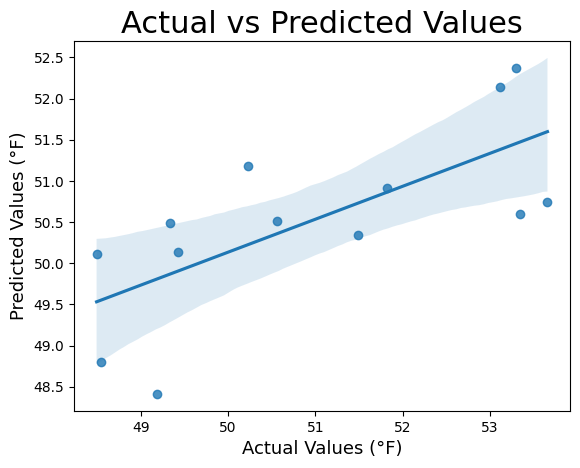

In [24]:
#linear regression model for temperature and CO2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

store = pd.read_csv('Datasets/TempvCO2.csv') #read in CO2 data from Nathan's analysis
store.dropna(inplace=True)
x = store['Annual CO₂ emissions'].values.reshape(-1, 1)
y = store['tavg'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #separating training vs testing data

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Coefficients: ') #model coefficients
print('Intercept: ' + str(regressor.intercept_)) 
print('Intercept: ' + str(regressor.coef_)) 

prediction = regressor.predict(x_test) #make prediction


compare = pd.DataFrame({'Actual': y_test, 'Predicted': prediction}) #compare actual and predicted values
print(compare.head)

sns.regplot(data=compare, x='Actual', y='Predicted') #graph actual vs predicted valated
plt.xlabel('Actual Values (°F)', fontsize = 13) 
plt.ylabel('Predicted Values (°F)', fontsize = 13)
plt.title('Actual vs Predicted Values', fontsize = 22)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction)) #print model metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("R^2 Values: ", metrics.r2_score(y_test, prediction))


In [25]:
#initializing value arrays for API Query
# values1 = []
# values2 = []

In [26]:
#sampling temperature values for 2023; run in batches due to request limitations
#DO NOT RUN- API key needs to be refreshed

# url = "https://meteostat.p.rapidapi.com/point/daily"

# for i in range(10, 13):

#     if (i < 10):
#         querystring = {"lat":41.505493,"lon": -81.681290,"start":("2023-0" + str(i) + "-01"),"end":("2023-0" + str(i) + "-01"),"units":"imperial"}

#     else:
#         querystring = {"lat":41.505493,"lon": -81.681290,"start":("2023-" + str(i) + "-01"),"end":("2023-" + str(i) + "-01"),"units":"imperial"}

#     headers = {
#         "x-rapidapi-key": "ae4d217936mshc03171f457253bcp10094djsnf873aa07cb5d",
#         "x-rapidapi-host": "meteostat.p.rapidapi.com"
#     }

#     response = requests.get(url, headers=headers, params=querystring)

#     print(response.json())
#     data = response.json()

#     for i in data['data']:
#         values1.append(i['tavg'])


# print(values1)


In [27]:
#sampling temperature values for 1980 in batches
#DO NOT RUN- API key needs to be refreshed

# for i in range(10, 13):

#     if (i < 10):
#         querystring = {"lat":41.505493,"lon": -81.681290,"start":("1980-0" + str(i) + "-01"),"end":("1980-0" + str(i) + "-01"),"units":"imperial"}

#     else:
#         querystring = {"lat":41.505493,"lon": -81.681290,"start":("1980-" + str(i) + "-01"),"end":("1980-" + str(i) + "-01"),"units":"imperial"}

#     headers = {
#         "x-rapidapi-key": "ae4d217936mshc03171f457253bcp10094djsnf873aa07cb5d",
#         "x-rapidapi-host": "meteostat.p.rapidapi.com"
#     }

#     response = requests.get(url, headers=headers, params=querystring)

#     print(response.json())
#     data = response.json()

#     for i in data['data']:
#         values2.append(i['tavg'])

# print(values2)

In [28]:
#h-testing for temperature

# paired = pd.DataFrame({'2023':values1, '1980':values2})

# paired.to_csv('paired_save.csv')

paired = pd.read_csv('Datasets/paired_save.csv')
print(paired)

print('Paired Mean Temp Across Months')

print(stat.shapiro(paired['2023'])) #checking for normality
print(stat.shapiro(paired['1980']))
print(stat.ttest_rel(paired['2023'], paired['1980'])) #paired-samples t-test for temp in 1980 and 2023

    Unnamed: 0  2023  1980
0            0  42.1  30.9
1            1  19.2  14.5
2            2  42.8   7.7
3            3  53.4  40.8
4            4  43.5  48.2
5            5  72.3  64.2
6            6  77.2  67.1
7            7  69.1  78.1
8            8  66.4  79.2
9            9  63.9  64.6
10          10  36.0  41.7
11          11  47.8  48.7
Paired Mean Temp Across Months
ShapiroResult(statistic=0.9527202418388712, pvalue=0.6770294165992807)
ShapiroResult(statistic=0.9439088121706455, pvalue=0.5503025493104667)
TtestResult(statistic=1.078826776332313, pvalue=0.30375315321994195, df=11)


In [29]:
#EPA API key refresh request
# requests.get('https://aqs.epa.gov/data/api/signup?email=cdp57@case.edu')

In [30]:
#request for air quality data
#DO NOT RUN- API key needs to be refreshed

# totals = []
# for i in range(1990, 2025):

#     response = requests.get('https://aqs.epa.gov/data/api/annualData/byCounty?email=cdp57@case.edu&key=indigomallard47&param=88101&bdate=' + str(i) + '0101&edate='+ str(i) + '1231&state=39&county=035')

#     response = response.json()

#     print(response)

#     list =[]

#     for i in response['Data']:
#         if i['site_number'] == '0034':
#             list.append(i['arithmetic_mean'])
#             print(i)
#     totals.append(list)

# print(totals)

# years = [1990 + i for i in range(0,len(totals))]

# air_av = []
# for i in totals: #averaging values if multiple measurements given for a year
#     air_av.append(np.mean(i))
# air = {'years': years, 'air_av': air_av}
# air = pd.DataFrame(air)
# air.to_csv('Cleveland FM2.5 Levels.csv') #storing air quality data as a csv



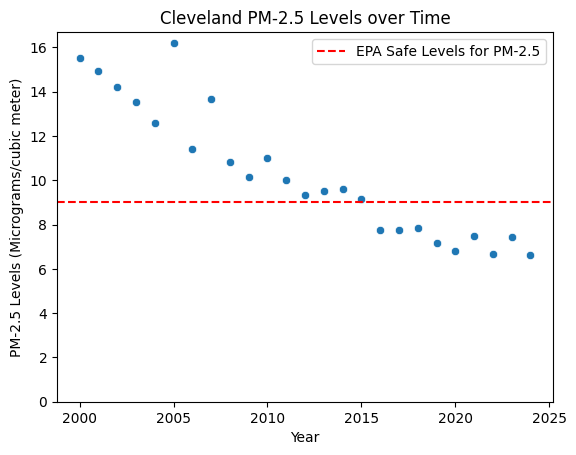

In [31]:
#air quality scatterplot

air = pd.read_csv('Datasets/Cleveland PM2.5 Levels.csv')

plot2 = plt.axhline(y=9, color = 'r', linestyle = 'dashed') #plotting scatterplot of air quality data
plt.legend(['EPA Safe Levels for PM-2.5'])
plot = sns.scatterplot(air, x=air.years, y=air.air_av)
plot.set_xlabel('Year')
plot.set_ylabel('PM-2.5 Levels (Micrograms/cubic meter)')
plot.set_title('Cleveland PM-2.5 Levels over Time')
plot.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16])


[[Model]]
    Model(model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 25
    # variables        = 2
    chi-square         = 24.4756788
    reduced chi-square = 1.06415995
    Akaike info crit   = 3.47010245
    Bayesian info crit = 5.90785410
    R-squared          = 0.88636440
[[Variables]]
    b:  15.2717542 +/- 0.42533186 (2.79%) (init = 1)
    a: -0.38321690 +/- 0.02861092 (7.47%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, a) = -0.8745


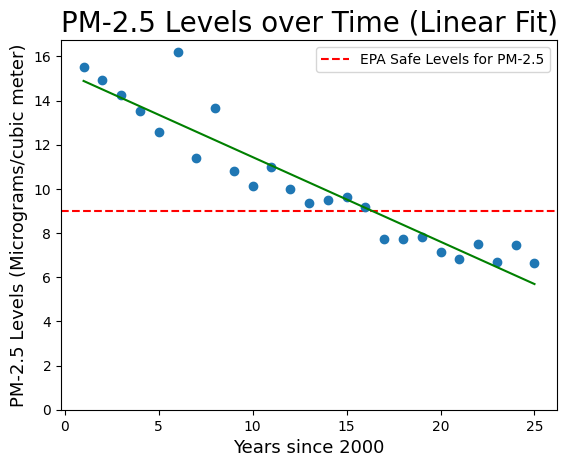

In [32]:
#air quality linear fitting
import matplotlib.pyplot as pyplot

from lmfit import Model

airfit = air.copy()
airfit.dropna(inplace=True)

x2_data = np.array(airfit.air_av)
time = np.arange(1 ,len(airfit.air_av)+1) #creating times series for independent variable



def model(b, a, time): #standard linear model
    return (b + a * time)


gmodel = Model(model, independent_vars=['time'])
result = gmodel.fit(x2_data, time=time, b=1, a=-0) #fit the model


print(result.fit_report())


plt.axhline(y=9, color = 'r', linestyle = 'dashed') #plot model results
plt.legend(['EPA Safe Levels for PM-2.5'])
plt.plot(time, x2_data, 'o')
plt.plot(time, result.best_fit, '-', label='best fit', color='green')
plt.xlabel('Years since 2000', fontsize = 13)
plt.ylabel('PM-2.5 Levels (Micrograms/cubic meter)', fontsize = 13)
plt.title('PM-2.5 Levels over Time (Linear Fit)', fontsize = 20)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
plt.show()

[[Model]]
    Model(model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 25
    # variables        = 3
    chi-square         = 19.7382748
    reduced chi-square = 0.89719431
    Akaike info crit   = 0.09209526
    Bayesian info crit = 3.74872273
    R-squared          = 0.90835921
[[Variables]]
    b:  16.3694556 +/- 0.61702711 (3.77%) (init = 1)
    a: -0.62715055 +/- 0.10935839 (17.44%) (init = 0)
    c:  0.00938206 +/- 0.00408293 (43.52%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.9707
    C(b, a) = -0.8845
    C(b, c) = +0.7742


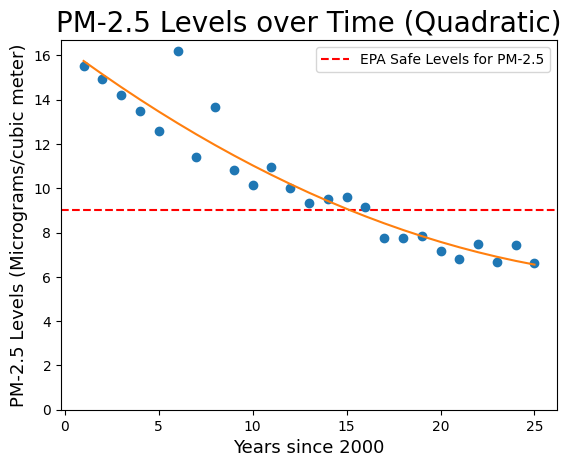

In [33]:
#air quality quadratic fitting
airfit = air.copy()
airfit.dropna(inplace=True)

x2_data = np.array(airfit.air_av)
time = np.arange(1 ,len(airfit.air_av)+1) #creating times series for independent variable



def model(b, a, c, time): #standard quadratic mode
    return (b + a * time + c * time**2)


gmodel = Model(model, independent_vars=['time'])
result = gmodel.fit(x2_data, time=time, b=1, a=0, c=0) #fit the model

print(result.fit_report())

plt.axhline(y=9, color = 'r', linestyle = 'dashed') #plot model results
plt.legend(['EPA Safe Levels for PM-2.5'])
plt.plot(time, x2_data, 'o')
plt.plot(time, result.best_fit, '-', label='best fit')
plt.xlabel('Years since 2000', fontsize = 13)
plt.ylabel('PM-2.5 Levels (Micrograms/cubic meter)', fontsize = 13)
plt.title('PM-2.5 Levels over Time (Quadratic)', fontsize = 20)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
plt.show()

In [34]:
#h-testing for air quality

print(stat.shapiro(air.air_av[11:])) #checking for normality

print('Mean T-Test')
print(stat.ttest_1samp(air.air_av[11:], popmean=9)) #testing if air quality after 2000 is at EPA safe levels

ShapiroResult(statistic=0.9204557678467895, pvalue=0.05977997810451005)
Mean T-Test
TtestResult(statistic=1.8420282879650334, pvalue=0.07840234606454184, df=23)
